In [1]:
import pandas as pd
TH2data={'Country':['Output,Q','Labour,L','Capital,K'],
     'B':[80,60,50],
     'C':[150,100,100],
     'D':[135,100,80],
     'E':[165,120,100],
     'F':[95,70,60],
     'G':[130,90,80],
     'H':[110,80,70]}
TH2data=pd.DataFrame(TH2data,columns=['Country','B','C','D','E','F','G','H'])
TH2data



,Country,B,C,D,E,F,G,H
0,"Output,Q",80,150,135,165,95,130,110
1,"Labour,L",60,100,100,120,70,90,80
2,"Capital,K",50,100,80,100,60,80,70


In [2]:
TH2data_transposed={'Country':['B','C','D','E','F','G','H'],
                   'Output,Q':[80,150,135,165,95,130,110],
                   'Labour,L':[60,100,100,120,70,90,80],
                   'Capital,K':[50,100,80,100,60,80,70]}
TH2data_transposed=pd.DataFrame(TH2data_transposed,columns=['Country','Output,Q','Labour,L','Capital,K'])
TH2data_transposed


,Country,"Output,Q","Labour,L","Capital,K"
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [3]:
TH2data_transposed.agg(['mean','var','std','median'])

,"Output,Q","Labour,L","Capital,K"
mean,123.571429,88.571429,77.142857
var,914.285714,414.285714,357.142857
std,30.237158,20.354010,18.898224
median,130.000000,90.000000,80.000000


In [2]:
L = TH2data_transposed['Labour,L']
L.hist(normed = 0, histtype = 'stepfilled', bins = 20)


NameError: name 'TH2data_transposed' is not defined

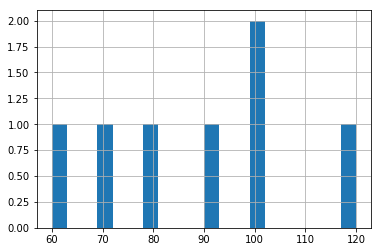

In [10]:
L = TH2data_transposed['Labour,L']
L.hist(normed = 0, histtype = 'stepfilled', bins = 20)


In [15]:
import numpy as np
y = np.log(TH2data_transposed['Output,Q'])
y



0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Output,Q, dtype: float64

In [16]:
x = np.log(TH2data_transposed[['Labour,L','Capital,K']])
x

,"Labour,L","Capital,K"
0,4.094345,3.912023
1,4.605170,4.605170
2,4.605170,4.382027
3,4.787492,4.605170
4,4.248495,4.094345
5,4.499810,4.382027
6,4.382027,4.248495


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x = sm.add_constant(x)
model = smf.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


/Users/xuanhuong/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/xuanhuong/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Output,Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        17:43:43   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.269      -0.170       0.463
Labour,L       0.5484      0.090      6.127      0.004       0.300       0.797
Capital,K      0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

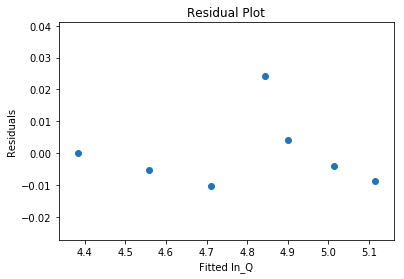

In [19]:
import matplotlib.pyplot as plt 
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Fitted ln_Q')
plt.show()
